## Deep Learning with Python
Kerasa MNIS veri setini yüklüyoruz.
Makine öğrenmesinde kategori, sınıflandırma problemlerinde sınıf olarak adlandırılır. Her bir veriye örnek denir. Belirli bir örneğin ait olduğumu sınıf etiket-label olarak adlandırılır.

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Ağ Mimarisi
Derin ağların temel yapı taşı, veri için filtre olarak düşünülebilecek veri işleme modülü olan KATMANLAR'dır.

*Dense - Fully Connected*: Önceki katman ile kendi katmanındaki tüm birimlerin birbirine tamamen bağlı olduğu katmandır.
İkinci katman, 10 adet çıktı birimi bulunan ve 10 elemanlı olasılık puanlarını gösteren (toplamları 1) bir diziyi geriye döndürür.

In [3]:
from keras import layers
from keras import  models
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

*Kayıp Fonksiyonu - Loos Function*: Ağımızın eğitim veri seti üzerinde kendi performansını gözlemlemesi ve böylece kendi kendine doğru yolu bulabilmesi için.
*Eniyileme - Optimization*: Ağımızın girdisi olan veri ile oluşturduğu kaybı göz önünde bulundurarak kendisini güncelleme mekanizması.      
*Eğitim ve test süresince takip edilecek metrikler*: Burada biz sadece doğruluğa (doğru sınıflandırılan görüntülerin toplam görüntü sayısına oranı) odaklanacağız.

### Derleme Adımı
Eğitime başlamadan önce, tüm girdilerimizdeki değerleri [0,1] aralığına ölçeklendiriyoruz.

In [5]:
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Girdilerin Hazırlanması
Bu aşamadan önce eğitim veri setimizdeki görüntüler (60000,28,28) şeklinde bir dizide ve her elemanı "uint8" veri tipinde [0,255] veri aralığında saklanmıştı.
Eğitim veri setindeki görüntüleri (60000,28,28) "float32" veri tipinde 0 ile 1 arasında olacak şekilde düzenliyoruz.



In [6]:
train_images = train_images.reshape((60000,28 * 28))
train_images = train_images.astype('float32') / 255 #Buradaki bölme işlemi 0-255 arasındaki değerli 0-1 arasında indirmek için.
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### Etiketlerin Hazırlanması
Kategorik olarak etikeliyoruz.

In [7]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Model Fit etmek (uydurmak)

In [8]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.4227 - accuracy: 0.8771
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1111 - accuracy: 0.9669
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0680 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0490 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0357 - accuracy: 0.9896


### Ağımızı test veri seti üzerinde deniyoruz.
Eğitim ve test seti arasındaki doğruluk oranı aralarındaki fark *Aşırı Uydurmanın (overfitting)* örneğidir.

In [9]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_acc:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0693 - accuracy: 0.9789
test_acc: 0.9789000153541565


Train_image'mizin eksen sayısını yani *ndim*'i görüntüleyelim.

Sonuç olarak, 8 Bitlik tam sayılar taşıyan 3B tensörümüz var.
Daha net konuşursak, 28x28 boyutundaki matrislerden 60000 adet bulunduran bir dizimiz var.
Her matris 0 ile 255 arasında bir değer alan gri ölçeğinde (grey scale) bir görüntüdür.(Bunu veri setinden biliyoruz.)

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Train Image'mizin ndim'i:",train_images.ndim,"\nTrain Image shape ve dtype:",train_images.shape,train_images.dtype)

### Veri setimizdeki 4'üncü örneğe bir göz atalım

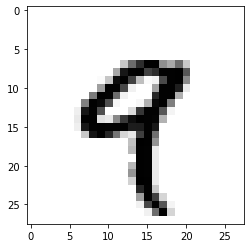

In [10]:
digit=train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Numpy ile Tensörler üzerinde işlemler
Bu örnek sayesinde 10 ile 100 (100 dahil değil) arasındaki örnekleri seçiyoruz. Bunlarıda bir dizi halinde kaydediyoruz.

In [15]:
my_slice = train_images[10:100]
print(my_slice.shape)
#Daha detay bir notasyon ile aynı örneği gösterelim
my_slice = train_images[10:100, : , : ] #Önceki ile aynı sonucu verir çünkü eksenleri seçmedik.
my_slice = train_images[10:100, 0:28, 0:28]#Önceki ile aynı sonucu verir çünkü bütün eksen boyunca seçim yaptık.
#Sağ alt köşeden 14x14'lük bir kısmı seçmek için:
my_slice = train_images[ : , 14: , 14: ]
#Ortadan 14x14'lük bir kısmı seçmek için:
my_slice = train_images[ : , 7:-7, 7:-7]

(90, 28, 28)


### Veri Yığını Notasyonu
Veri taşıyan tensörlerin genellikle birinci ekseni *örnek ekseni*'dir. MNIST örneğimizde, örneklerimiz rakamların görüntüleridir.
Derin öğrenme modelleri tüm verileri bir kere de kullanmak yerine, küçük *yığınlara-Batch* ayırır.


In [16]:
batch = train_images[:128]# Büyüklüğü 128 olan bir yığın.
batch = train_images[128:256]# Bir sonraki yığın....
# n'inci yığını gösterebilmek içinse:
n=0 #n sıfırdan başladığını varsayıyoruz.
batch = train_images[n*128: (n+1)*128]

# Veri Tensörleri için Gerçek Dünya Örnekleri
**Vektör Verisi**: 2B Tensörler (örnekler, öznitelikler)   
**Zaman Serisi verisi ya da ardaşık veri**: 3B Tensörler (örnekler, zaman_adımı, öznitelikler)   
**Görüntüler**: 4B Tensörler (örnekler, yükseklik, genişlik, kanallar)   
**Video**: 5B Tensörler (örnekler, kareler, yükseklik, genişlik, kanllar)   

### Vektör Verisi
Birinci eksen "Örnek Ekseni" ikinci eksen "Öznitelik Ekseni"dir. Gerçek Hayat Örneği;            
Sigorta istatistikleri veri setimizde her kişi için yaş, posta kodu, ve aylık gelir bilgileri olsun.
Her kişi için üç değerli bir vektör olursa 100000 kişi için tüm veri seti (100000, 3) olur.

### Zaman Verisi ya da Ardaşık Veri
Ne zaman veri setinde zaman ( ya da ardaşıklık durumu) işin içine girerse verileri bir ekseni zaman olacak şekilde 3B tensörlerde saklamak gerekir.
Zaman ekseni olarak ikinci eksen( eksenler sıfırdan başlar yani eksen 1) olarak kullanımı yaygındır.Örnek olarak Hisse senedi veri seti:   
Her dakika bir hisse senedinin anlık en düşük fiyatını ve en yüksek fiyatını saklayacağız.
Dolayısıyla her dakika 3B bir vektör olacağından tüm günün verisi (390, 3) şeklinde bir 2B tensör ve 250 günlük veri ise (250,390,3) şeklinde bir 3B tensör olacaktır.Burada her örnek bir günün tüm verisini oluşturacaktır.
Bir diğer Örnek ise;    
Her bir 128 farklı karakterden birisi olan 280 karakterlik bir dizi olacak şeklinde tweet verisi olsun.
Bu durumda her karekter 128 elemanlı bir ikilik-binary vektör olacaktır.(Tüm elemanlar sıfır, sadece ilgili karakterin indeksi 1 olacak.)
Sonra her tweet (280, 128) şeklinde bir 2B tensör olacağından 1 milyon tweet bulunan veri setimiz (1000000, 280, 128) şeklinde bir tensör olacaktır.

### Görüntü Verisi
Görüntülerin tipik olarak 3 boyutu vardır: Yükseklik, genişlik ve kanal sayısı.
256x256 boyutunda 128 gri ölçekli ( gri ölçekte görüntülerin sadece 1 kanalı mevcuttur.) örnekler için yığın (128, 256, 256, 1) şeklinde olur.
3 renk derinliği olan bir görüntü içinse (128, 256, 256, 3) şeklinde tensörler olacaktır.
Tensorflow renk derinliği eksenini en sonda kullanır. (örnekler, yükseklük, genişlik, kanallar)

### Video Verisi
Video (5B Tensörler), her biri renkli ardaşık kareler olarak düşünülebilir. (örnek, kare, yükseklik, genişlik, kanllar)
Örneğin 60 saniyelik, 144x256 boyutunda bir Youtube videosu saniyede 4 kare ile örneklenmiş olsun (toplam 240 kare).
Böyle 4 video bulunan bir yığın  (4, 240, 144, 256, 3) şeklinde bir tensör olacaktır.
Toplamda 106168320 değer. Eğer veri tipi float32 olursa bu tensörün büyüklüğü 405mb olacaktır.
Gerçek hayatta kullandığımız videolar daha küçüktür çünkü, veri tipi float32 değildir ve yüksek oranda sıkıştırılırlar.

### Tensör İşlemleri
AND, OR, NOR vb. işlemlerin tensör verileri üzerinde uygulanması gibidir. Tensör toplamı, çarpımı vb.

In [20]:
import keras
keras.layers.Dense(512, activation='relu')

Bu katmanı 2 boyutlu bir girdiyi iki boyutlu bir girdiye dönüştüren bir fonksiyon olarak düşünebiliriz.
Böylece fonksiyon W: 2B bir tensör, b: bir vektör olmak üzere;
`output = relu(dot(W, input) + b)`   
Burada 3 tensör işlemi bulunmaktadır;
1. Girdi verileri ile W'nun iç çarpımıdır.(dot)
2. İç çarpımın sonucu ile b vektörünün toplanmasıdır.
3. relu(max(x,0)) işlemidir.

### Eleman Bazlı İşlemler
**relu** ve **toplama** işlemi *eleman bazlı-element wise* işlemlerdir. Bu işlemler tensörün her elemanına ayrı ayrı uygulanırlar.
Bu da eleman bazlı işlemleri paralel programlamaya uygun hale getirirler.
Python'da naif bir şekilde elemaz bazlı işlemleri yapmak için relu'da olduğu gibi for döngüsü ile yapabiliriz;


In [22]:
def naive_relu(x): #x, 2B Numpy Tensörüdür.
    assert len(x.shape) == 2 
    x = x.copy() # Giren tensörün üzerine yazmamak için.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j],0)
    return x
#Toplama işlemi için:
def naive_add(x, y):
    assert len(x.shape) == 2 # x ve y 2B bir Numpy Tensörü
    assert x.shape == y.shape
    x = x.copy() # Giren tensörün üzerine yazmamak için.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += x[i,j]
    return x
# Aynı işlemlerin Numpy ile yapımı:
z = x + y # Eleman bazlı toplama
z = np.maximum(z,0.) # Eleman bazlı relu

NameError: name 'x' is not defined

### Yayma Operasyonu
Bir önceki naive_Add naif uygulamamız sadece aynı şekle sahip ve 2B tensörleri destekliyor.
Daha önce Dense katmanında 2B bir tensör ile bir vektörü topladık. O zaman iki farklı şekle sahip tensör söz konusu olduğunda şöyle yapılır;
Mümkün olduğunda ve anlam farklılığı olmadığında küçük tensör büyük tensörün şekline yayılır-broadcast. Yayma iki aşamada gerçekleşir:
1. Küçük tensöre eksenler (yayma ekseni olarak adlandırılır) eklenerek büyük tensörün ndim ile eşit hale getirilir.
2. Küçük tensör yeni eksen üzerinde tekrarlanarak büyük tensörün şekli ile aynı şekle getirilir.   

(32,10) şeklinde bir X tensörü ve (10, ) şeklinde bir y düşünelim. Önce y'ye bir boş eksen ekleyelim ve böylece y (1,10) şeklinde olsun.
Bu yeni eksende y'yi 32 defa tekrar edersek (32,10) şeklinde bir Y elde ederiz.
Her `i range(0,32)` olmak üzere `Y[i,:] == y` olacaktır. Artık X ve Y aynı şekle gelmiş oldular.
Bu tekrarlama işlemi tamamen sanal olarak yapıldı:Hafıza seviyesi yerine algoritmik olarak yapıldı.
Çünkü vektürü yeni eksen üzerinde 10 kez tekrar etmek oldukça akılcı bir işlemdir.   
Örnek olarak ve konuyu daha iyi kavrayabilmek için [buradaki](https://machinelearningmastery.com/broadcasting-with-numpy-arrays/) yazıyı okuyabilirsiniz.



In [54]:
import numpy as np
from numpy import array

x=array([[0,1],[3,4]])
y=array([2,3])

def naive_add_matrix_and_vector(x,y):
    assert len(x.shape) == 2 # x 2B Numpy vektörü.
    assert len(y.shape) == 1 # y Numpy vektörü.
    assert x.shape[1] == y.shape[0]
    
    x = x.copy() # Girdinin üzerine yazmamak için.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[j]
    return x

print(naive_add_matrix_and_vector(x,y))
#Eleman bazlı maximum işlemi:

# x (64, 3, 32, 10) şeklinde rastgele değerli olan bir tensör.
"""
x = np.random.random((64, 3, 32, 10))
y =np.random.random((32, 10)) # y (32, 10) şeklinde rastgele değerli bir tensör.

z= np.maximum(x,y) # z çıktısının şekli (64,3,32,10)
print(z.shape)
"""


[[2 4]
 [5 7]]


'\nx = np.random.random((64, 3, 32, 10))\ny =np.random.random((32, 10)) # y (32, 10) şeklinde rastgele değerli bir tensör.\n\nz= np.maximum(x,y) # z çıktısının şekli (64,3,32,10)\nprint(z.shape)\n'

### Tensör iç Çarpımı (Dot Product)
İç çarpım `(dot)` işlemi aynı zamanda tensör çarpımı (eleman bazlı çarpım ile karıştırmamalıyız) olarak da anılır ve çok kullanışlı bir tensör işlemidir. Eleman bazlı işlemlere kıyasla iki girdisini birleştirir.   
Eleman bazlı çarpım işlemi Numpy, Keras, Theano ve TensorFlow'da * operaötü ile yapılır. `dot`işlemi Tensorflow'da farklı bir söz dizimi kullanır. Ancak hem Numpy hem de Keras standart dot işlemini kullanır.   
Matematiksel gösterini şöyledir;    
**z = x.y**

In [1]:
import numpy as np
x=np.array([[0,1],[3,4]])
y=np.array([2,3])
z = np.dot(x,y)
print(z)

[ 3 18]


Matematiksel olarak iç çarpım işlemi ne yapmaktadır? Önce iki vektörün iç çarpımını yapalım:

In [11]:
x=np.array([0,1,2])
y=np.array([2,3,4])
def naive_vector_dot(x,y):
    assert len(x.shape) == 1 # x ve y Numpy vektörleri. Eğer iki olsaydı matris olurlardı.
    assert len(y.shape) == 1 
    assert x.shape[0] == y.shape[0] # x ve y Numpy vektörlerinin uzunlukları eşit olmak zorundadır.
    
    z=0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

print(naive_vector_dot(x,y))
print("X.shape:", len(x.shape), x.shape[0])

11.0
X.shape: 1 3


İki vektörün iç çarpımı skalerdir ancak iki vektörün eleman sayılarının aynı olması halinde iç çarpım yapılabilmektedir.
Aynı zamanda bir *x* matrisi ile *y* vektörünün de iç çarpımını yapmak mümkündür. Sonuçta elemanları *y* vektörü ile *x* matrisinin satırlarının çarpımından oluşan bir vektör elde edilir. Daha detaylı bilgi için [buraya](https://towardsdatascience.com/linear-algebra-basics-dot-product-and-matrix-multiplication-2a7624942810#:~:text=Dot%20products%20are%20done%20between,to%20the%20number%20of%20columns.) bakabilirsiniz. Bu iç çarpımı yapan kod şu şekildedir;

In [13]:
import numpy as np
x=np.array([[0,1],[3,4]])
y=np.array([2,3])
def naive_matrix_vector_dot(x,y):
    assert len(x.shape) == 2# x Numpy Matrisi
    assert len(y.shape) == 1# y Numpy Vektörü
    assert x.shape[1] == y.shape[0]# x matrisinin birinci boyutu ile y vektörünün sıfırıncı boyutunun aynı olması gerekir.
    
    z=np.zeros(x.shape[0])# Bu işlem y ile aynı şekle sahip 0'lardan oluşan bir vektör oluşturur.
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z
print(naive_matrix_vector_dot(x,y))
print(np.zeros(x.shape[0]))

[ 3. 18.]
[0. 0.]


Bu noktada daha önce yazdığımız ve matris vektör çarpımı ile vektör çarpımında kullandığımız kodu kullanmamız mümkündür.

In [8]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

İki tensörden herhangi birinin *ndim* boyutunun 1'den büyük olması halinde iç çarpım simetrik olmayacaktır. Yani `dot(x,y) dot(y,x)`'den farklı olacaktır.   
Elbette iç çarpım herhangi boyutta tensörlerle genelleştirilebilse de genellikle iki matrisin iç çarpımında uygulanmaktadır. İki matrisin iç çarpımını `(dot(x,y))` ancak `x.shape[1], y.shape[0]` olması halinde yapabiliriz. Sonuç olarak da `(x.shape[0], y.shape[1])` şeklinde olan ve elemanları *x* matrisinin satırları ile *y* matrisinin sütunlarının çarpımına eşit olan bir matris oluşacaktır. Bunun kodlaması şu şekildedir;

In [9]:
def naive_matrix_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    # x'in 1'inci ekseni ile y'nin 0'ıncı ekseninin boyutları aynı olmalıdır.
    assert x.shape[1] == y.shape[0]# Yani x'in sütunu y'nin satırı eşit olmalı
    z=np.zeros((x.shape[0]), y.shape[1])# Bu işlem istenen boyutta tüm elemanları sıfır olan bir matris döndürür.
    for i in range(x.shape[0]):# x'in satırları üzerinde döner.
        for j in range(y.shape[1]):# y'nin sütunları üzerinde döner.
            row_x = x[i,:]
            column_y = y[:,j]
            z[i,j] = naive_vector_dot(row_x,column_y)
    return z

### Tensör Şekil Değiştirme
Tensör şeklini değiştirme satır ve sütunlarını ayarlayarak hedef şekle uygun hale getirme anlamına gelir. Yeniden şekillendirilmiş tensör doğal olarak önceki tensör ile aynı eleman sayısına sahip olacaktır.

In [16]:
x = np.array([
    [0.,1.],
    [2.,3.],
    [4.,5.]])
print(x.shape)

(3, 2)


In [18]:
x = x.reshape((6,1))
print(x)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]


In [22]:
x = x.reshape((2,3))
print(x)

[[0. 1. 2.]
 [3. 4. 5.]]


Tensör şekil değiştirmenin özel bir hali de *devrik-tanspose* işlemidir. Matrisin devriğinin alma satır ve sütunların yer değiştirmesi anlamına gelmektedir. Yani x[i,:], x[:,i] haline gelmektedir.

In [25]:
x = np.zeros((300,20))
x = np.transpose(x)
print(x.shape)

(20, 300)


### Tensör İşlemlerinin Geometrik Gösterimi
Tensörün elemanlarının greometrik uzayda bir nokta olduğunu düşünülürse tüm tensör işlemlerinin geometrik gösterimi mevcuttur. İlgin-affine dönüşümler, yön değiştirmeler, büyütme, küçültme gibi temel geometrik işlemler tensör işlemi olarak ifade edilebilir. Örneğin 2B bir vektörün yönünün değiştirilmesi 2x2'lik bir matris olan `R = [u,v]` ile iç çarpımı yapılarak elde edilebilir. Burada `u = [cos(theta),sin(theta)]` ve `v = [-sin(theta),cos(theta)]` olacak şekilde theta açısı kadar vektörün yönünün değiştirilmesi mümkündür.

### Momentumlu Stokastik Gradyan İnişi

`past_velocity = 0.`   
`momentum = 0.1 #Sabit momentum faktörü`    
    
`while loss > 0.01: #Eniyileme Faktörü`   
`   w, loss, gradient = get_current_parameters()`   
`   velocity = past_velocity * momentum +learning_rate * gradient`   
`   w = w + momentum * velocity - learning_rate *gradient`   
`   past_velocity = velocity`   
`   update_parameters(w)`

## Film Kritiklerini Sınıflandırma: İkili Sınıflandırma Örneği
Bu örnekte, film kritiklerinin içeriklerine bakarak olumlu, olumsuz olarak sınıflandıracağız.

### IMBD Veri Seti
50000 adet film kritiği içeren IMBD veri setini kullanacağız. 25 örnek eğitim veri seti olarak 25000 örnek ise test veri tabanı olarak, kullanılmak üzere ikiye ayrılmıştır. Aynı MNIST veri seti gibi IMBD veri setide Keras ile beraber gelmektedir ve önişlemden geçirilmiştir: Kritikler (kelime dizileri) her sayının sözlükte bir kelimeyi temsil eden sayı dizisine dönüştürülmüştür.

In [10]:
from keras.datasets import imdb
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000) 

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/batu/Desktop/my_project/venv/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/batu/Desktop/my_project/venv/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different length

`max_words` parametresi ile en sık tekrar eden 10000 örneği saklayıp nadir örnekleri göz ardı ettik. Böylece bu yönetilebilir bir vektör verisi ile çalışma imkanı sağlayacaktır.   
En çok kullanılan 10000 kritiği kullanacağımız için hiçbir kelime indeksi 10000'i geçmyecektir.

In [11]:
max([max(sequence) for sequence in train_data])

9999

Kelimelerin index numarası şeklinde tutulduğu veriyi tekrar İngilizce kelimelere aşağıdaki kod ile dönüştürebiliriz.

In [13]:
# word_index kelimeleri bir tam sayı indekse eşleyen sözlüktür.
word_index=imdb.get_word_index()

1646592/1641221 [==============================] - 1s 0us/step


In [14]:
# Tam sayı indexleri kelimelere dönüştürür.
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

Kritikleri alır. İndeks değerlerini 3 atlayarak almaktayız. Çünkü 0,1 ve 2 sırasıyla yapılan sıfır eklemelerini, dizinin başlangıcını ve bilinmeyenleri kodlamak için ayrılmıştır.

In [15]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])